In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the data set
food = pd.read_csv('restaurants.csv')

In [3]:
# Inspect the data
df = pd.DataFrame(food)
print(df)
print("\nAny missing variables:", df.isnull().values.any())
print("\nData types by column:\n", df.dtypes)

    Cuisine  Location  Seats  Success
0   Italian  Downtown     50        1
1   Chinese   Suburbs     30        0
2  American  Downtown     70        1
3   Mexican   Suburbs     60        1
4  Japanese  Downtown     40        0
5   Italian  Downtown     55        1
6   Chinese   Suburbs     35        0
7  American  Downtown     80        1
8   Mexican   Suburbs     65        1
9  Japanese  Downtown     45        0

Any missing variables: False

Data types by column:
 Cuisine     object
Location    object
Seats        int64
Success      int64
dtype: object


In [16]:
# One Hot Encoder
encoder = OneHotEncoder(sparse_output=False)
X = df.drop('Success', axis=1)
y = df['Success']

X_encoded = encoder.fit_transform(X[['Cuisine', 'Location']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Cuisine', 'Location']))
X_encoded_df = pd.concat([X_encoded_df, df[['Seats']]], axis=1)  # done horizontally

Model Evaluation and Building

In [19]:
# Split Data into Training/Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

Accuracy with k=3: 1.0
Accuracy with k=5: 1.0
Accuracy with k=7: 0.5


Text(0.5, 0, 'k value')

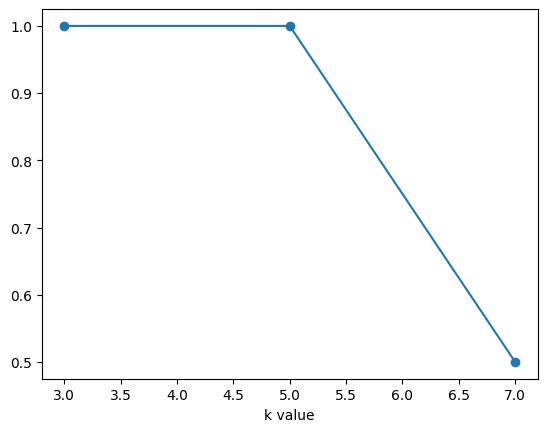

In [20]:
# Initialize and Train the Classifier
from sklearn.neighbors import KNeighborsClassifier

k_values = [3,5,7]
accuracies = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"Accuracy with k={k}: {accuracy}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')

Thus, either a k-value of 3 or 5 is the best